# Onion Article Classification

## Data Pre-processing

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

### Download NLTK stopwords data (if not already downloaded)

In [ ]:
nltk.download('stopwords')

### Import Dataset

In [3]:
df = pd.read_csv("OnionOrNot.csv")

In [4]:
df.head()

,text,label
0,Entire Facebook Staff Laughs As Man Tightens P...,1
1,Muslim Woman Denied Soda Can for Fear She Coul...,0
2,Bold Move: Hulu Has Announced That They’re Gon...,1
3,Despondent Jeff Bezos Realizes He’ll Have To W...,1
4,"For men looking for great single women, online...",1


### Remove unimportant characters

In [5]:
def cleanText(text):
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)    # remove punctuations
    text = re.sub('\s+', ' ', text)                                                         # remove extra whitespace
    return text

In [6]:
df['text'] = df['text'].apply(lambda x: cleanText(x))

### Remove stop words

In [7]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

In [8]:
df['text'] = df['text'].apply(remove_stopwords)

<Axes: xlabel='label', ylabel='count'>

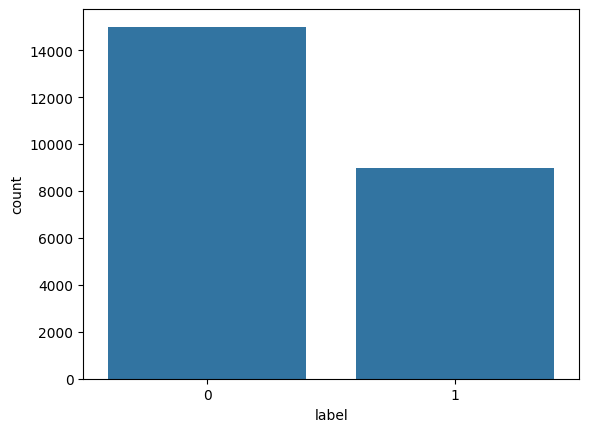

In [9]:
X = df['text'].values.reshape(-1, 1)
y = df['label']

sns.countplot(x="label", data=df)

### Use RandomOverSampler to balance the labels

In [ ]:
X = df['text'].values.reshape(-1, 1)
y = df['label']

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

X_resampled_df = pd.DataFrame(X_resampled, columns=['text'])
balanced_df = pd.DataFrame({'text': X_resampled_df['text'], 'label': y_resampled})

<Axes: xlabel='label', ylabel='count'>

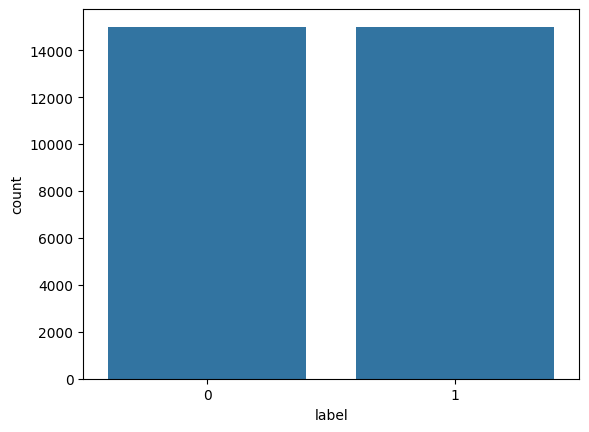

In [11]:
sns.countplot(x="label", data=balanced_df)

## Train the model

In [12]:
# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X_resampled.ravel())  # Flatten the array for vectorization

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y_resampled, test_size=0.3, random_state=42)

### Train a Naive Bayes classifier

Accuracy: 0.8586666666666667

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      4439
           1       0.86      0.87      0.86      4561

    accuracy                           0.86      9000
   macro avg       0.86      0.86      0.86      9000
weighted avg       0.86      0.86      0.86      9000



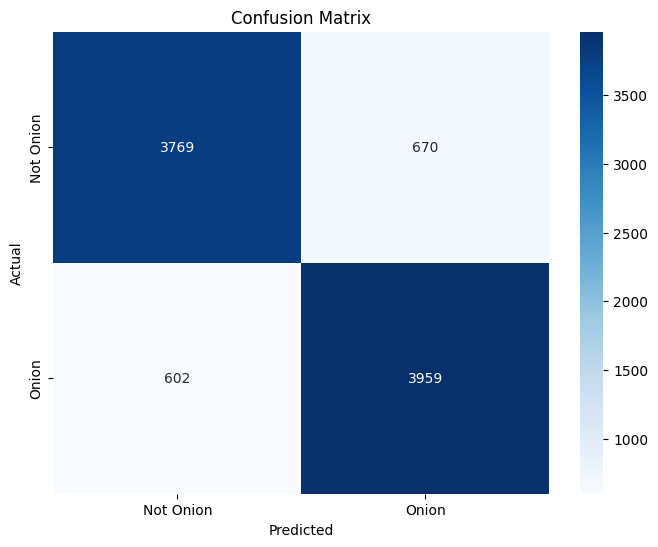

In [14]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Onion', 'Onion'], yticklabels=['Not Onion', 'Onion'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### Train an SVM classifier

Accuracy: 0.8615555555555555

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86      4439
           1       0.84      0.89      0.87      4561

    accuracy                           0.86      9000
   macro avg       0.86      0.86      0.86      9000
weighted avg       0.86      0.86      0.86      9000



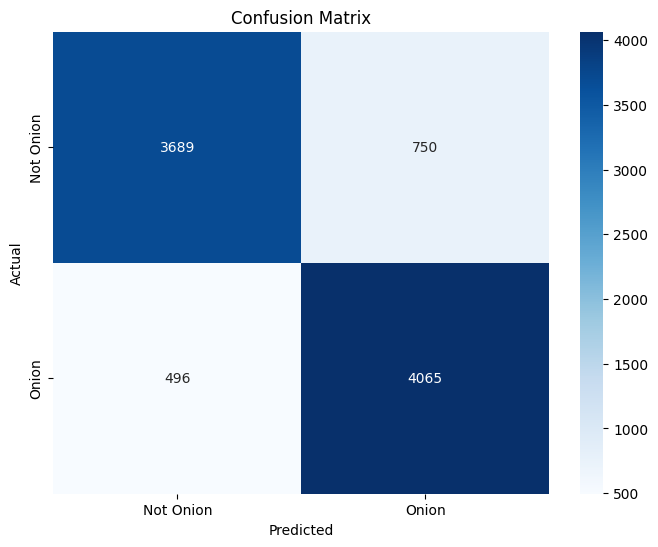

In [15]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Onion', 'Onion'], yticklabels=['Not Onion', 'Onion'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### Train a Logistic Regression classifier

Accuracy: 0.872

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      4439
           1       0.86      0.89      0.88      4561

    accuracy                           0.87      9000
   macro avg       0.87      0.87      0.87      9000
weighted avg       0.87      0.87      0.87      9000



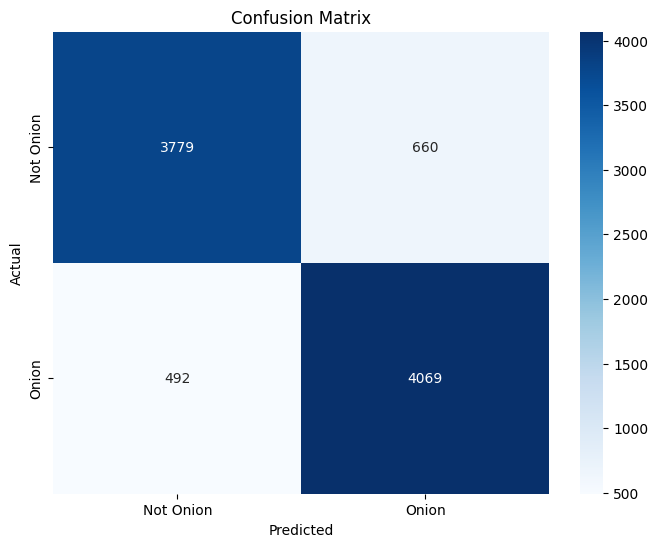

In [16]:
logreg_model = LogisticRegression(max_iter=1000, random_state=42)  # max_iter ensures convergence
logreg_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Onion', 'Onion'], yticklabels=['Not Onion', 'Onion'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### Predict if a text is Onion or Not Onion

In [17]:
def preprocess_text(text):
    text = cleanText(text)          # Clean the text
    text = remove_stopwords(text)   # Remove stopwords
    return text

In [18]:
def predict_onion_or_not(text, model, vectorizer):
    processed_text = preprocess_text(text)
    
    # Vectorize the text using the previous vectorizer
    text_vectorized = vectorizer.transform([processed_text])
    
    # Predict the label (0 or 1)
    prediction = model.predict(text_vectorized)
    
    # Map the prediction to a label (0 -> "Not Onion", 1 -> "Onion")
    if prediction == 1:
        return "Onion"
    else:
        return "Not Onion"

In [19]:
text_to_predict = "Breaking news: Local man found the truth about onion news!"

# Get prediction
prediction = predict_onion_or_not(text_to_predict, logreg_model, vectorizer)
print(f"Prediction: {prediction}")

Prediction: Onion
